In [1]:
# # for colab

# from google.colab import drive
# import os

# drive.mount('/content/drive')
# main_dir = '/content/drive/MyDrive/Graduate Project'
# os.chdir(main_dir)
# os.getcwd()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


'/content/drive/MyDrive/Graduate Project'

In [6]:
import pandas as pd
import geopandas as gpd

zillow_df = gpd.read_file('../dataset/raw/2. zillow_cleaned.geojson')
zillow_tokenized_df = gpd.read_file('../dataset/raw/3. zillow_tokenized.geojson')
zillow_tokenized_df

,zpid,city,submarket,zipcode,address,price,like,view,duration,day,single,parking,bathroom,bedroom,age,living,description,geometry
0,4171164,CH,South,60617,10905 S Avenue H,309000,0,20,134,64,0,2.5,4.0,4.0,81.0,2376.0,tastefully and professionally updated 4 bedroo...,POINT (-87.53252 41.69706)
1,80851025,CH,South,60616,475 W 24th St APT 5H,265000,0,44,50,7,1,1.0,2.0,2.0,19.0,900.0,experience city living a it finest in this top...,POINT (-87.63969 41.84879)
2,2127908883,CH,West,60612,2827 W Congress Pkwy APT 3,230000,0,7,90,83,1,1.0,2.0,2.0,17.0,1300.0,offering exceptional comfort convenience and e...,POINT (-87.69721 41.87457)
3,60265291,CH,North,60614,2712 N Ashland Ave #4A,460271,0,20,25,64,1,1.0,2.0,2.0,24.0,1700.0,looking for an updated extra wide 2 bedroom 2 ...,POINT (-87.66872 41.93097)
4,3700052,CH,North,60640,5415 N Sheridan Rd APT 306,319000,2,112,37,40,1,1.0,2.0,2.0,51.0,1250.0,discover the allure of this 2 bedroom 2 bathro...,POINT (-87.65439 41.97993)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10106,20383564,LA,West LA,90045,8117 Chase Ave,1811700,4,186,41,7,0,4.0,3.0,4.0,78.0,1892.0,welcome to this impressive westchester home vi...,POINT (-118.41126 33.96461)
10107,20510134,LA,West LA,90067,10128 Empyrean Way APT 302,2100000,0,17,178,79,1,2.0,4.0,2.0,45.0,2498.0,from the foyer enter to a sophisticated living...,POINT (-118.40809 34.05322)
10108,19905411,LA,San Fernando Valley,91335,7428 Vanalden Ave,815000,0,59,5,47,0,2.0,1.0,3.0,72.0,1670.0,major equity opportunity in the city of reseda...,POINT (-118.54884 34.20552)
10109,302794497,LA,West LA,90094,12678 Millennium,3715000,1,140,78,12,0,3.0,5.0,4.0,7.0,3639.0,embrace luxury living and the best in playa vi...,POINT (-118.41388 33.97678)


In [2]:
keys_1 = [
    'freq_CH_0', 'binary_CH_0', 'features_CH_0', 'dummies_CH_0',
    'freq_CH_1', 'binary_CH_1', 'features_CH_1', 'dummies_CH_1',
    'freq_NY_0', 'binary_NY_0', 'features_NY_0', 'dummies_NY_0',
    'freq_NY_1', 'binary_NY_1', 'features_NY_1', 'dummies_NY_1',
    'freq_LA_0', 'binary_LA_0', 'features_LA_0', 'dummies_LA_0',
    'freq_LA_1', 'binary_LA_1', 'features_LA_1', 'dummies_LA_1'
]
X_combined_dict = {}
for key in keys_1:
    X_combined_dict[key] = pd.read_hdf(os.path.join(main_dir, 'dataset', '3. ha_freq_binary.h5'), key=key)

# GPT Cluster

In [3]:
gpt_emb = pd.read_csv('../dataset/raw/5. gpt_embedding.csv', dtype={'zpid': str})
gpt_emb

,zpid,emb_0,emb_1,emb_2,emb_3,emb_4,emb_5,emb_6,emb_7,emb_8,...,emb_1526,emb_1527,emb_1528,emb_1529,emb_1530,emb_1531,emb_1532,emb_1533,emb_1534,emb_1535
0,4171164,-0.013918,0.004839,0.005308,0.039754,-0.025679,-0.017806,0.002553,-0.001223,0.003970,...,-0.033456,-0.015177,-0.001198,-0.005905,0.011247,-0.010914,0.019671,-0.012488,-0.022106,0.002256
1,4016685,0.017564,-0.005553,-0.014397,0.058491,-0.027301,0.003736,0.067077,0.052751,0.024087,...,-0.009025,-0.018181,-0.008699,0.035555,0.030360,0.011361,-0.034511,0.001933,-0.028226,-0.038306
2,3638932,-0.023234,0.014270,0.036595,0.019206,-0.009327,0.003297,-0.008983,-0.000913,-0.000361,...,-0.015792,-0.028441,-0.002742,-0.001154,0.018998,-0.007767,-0.001827,-0.031192,-0.024561,-0.022903
3,4116360,0.006453,0.024477,0.081049,0.059335,-0.047977,-0.036548,0.037977,0.020036,0.016929,...,-0.021536,0.007333,-0.001665,-0.006363,0.022548,-0.014512,-0.035048,0.018000,0.005333,0.009161
4,3946804,-0.013713,0.003369,0.017432,0.048213,-0.015954,-0.036166,-0.002469,0.026674,0.022516,...,-0.050893,-0.023756,-0.012986,-0.012454,0.010501,-0.011026,0.023719,0.016643,-0.034138,-0.021690
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10106,81960930,-0.008554,-0.067872,0.017484,0.028124,0.022804,-0.023987,0.022546,0.002194,0.023261,...,0.023108,-0.007382,0.013124,0.023460,0.010968,-0.015655,0.001986,0.011788,-0.020659,0.002332
10107,2064365471,-0.031547,-0.039820,0.002346,0.027748,-0.032194,0.005301,0.007697,-0.003039,0.009596,...,-0.009934,-0.001922,0.002774,-0.027663,0.016660,0.011953,0.009962,-0.012453,-0.003215,0.008745
10108,20128161,-0.005098,0.000693,0.012109,0.044571,0.005793,0.000776,0.015020,-0.009429,0.025104,...,-0.020976,-0.004073,-0.033508,-0.001022,0.011024,-0.016542,0.002021,-0.027500,0.015338,-0.027526
10109,20741270,-0.012511,-0.038329,0.015084,0.031010,-0.031477,0.006747,0.011705,0.016931,0.034026,...,0.032272,0.003175,0.041229,0.011383,0.044643,-0.002637,-0.001842,0.033863,-0.001619,-0.010570


100%|██████████| 20/20 [00:43<00:00,  2.20s/it]


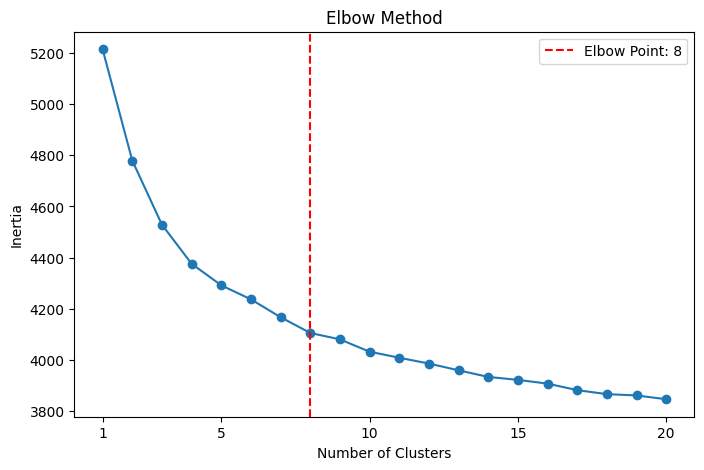

In [4]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from tqdm import tqdm

# Select embedding columns (excluding 'zpid')
embedding_columns = gpt_emb.columns[1:]

# Calculate inertia for different numbers of clusters
inertia = []
cluster_range = range(1, 21)  # Test for N clusters

for k in tqdm(cluster_range):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(gpt_emb[embedding_columns])
    inertia.append(kmeans.inertia_)

# Calculate the elbow point
max_inertia = max(inertia)
min_inertia = min(inertia)
threshold = 0.05 * (max_inertia - min_inertia)  # Define the threshold for detecting the elbow
elbow_point = None

for i in range(1, len(inertia)-1):
    if (inertia[i-1] - inertia[i]) < threshold and (inertia[i] - inertia[i+1]) < threshold:
        elbow_point = i + 1  # Adding 1 to get the actual cluster number
        break

# Plotting the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, inertia, marker='o')
plt.title('Elbow Method')
plt.xticks([1, 5, 10, 15, 20])
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
if elbow_point:
    plt.axvline(x=elbow_point, color='red', linestyle='--', label=f'Elbow Point: {elbow_point}')
plt.legend()
plt.show()

# Fit K-means with the elbow point
kmeans = KMeans(n_clusters=elbow_point, random_state=42)
gpt_emb['cluster'] = kmeans.fit_predict(gpt_emb[embedding_columns])

# Save
gpt_cluster_dict = {}

for city in ['CH', 'NY', 'LA']:
    for single in [0, 1]:
        zpids = X_combined_dict[f"features_{city}_{single}"]['zpid'].tolist()
        table = gpt_emb.loc[gpt_emb['zpid'].isin(zpids), ['zpid', 'cluster']]
        table = pd.get_dummies(table, columns=['cluster'], prefix='cluster', drop_first=False)
        table = table.astype(int)
        table['zpid'] = table['zpid'].astype(str)
        if 'cluster_0' in table.columns:
            table = table.drop(columns=['cluster_0'])
        gpt_cluster_dict[f"gpt_{city}_{single}"] = table

for key, df in gpt_cluster_dict.items():
    df.to_hdf(os.path.join(main_dir, 'dataset', '7. gpt_cluster.h5'), key=key, mode='a', format='table')

## Analysis

In [7]:
zillow_tokenized_df = pd.merge(zillow_tokenized_df, gpt_emb.loc[:, ['zpid', 'cluster']], on='zpid', how='inner')
zillow_tokenized_df

,zpid,city,submarket,zipcode,address,price,like,view,duration,day,single,parking,bathroom,bedroom,age,living,description,geometry,cluster
0,4171164,CH,South,60617,10905 S Avenue H,309000,0,20,134,64,0,2.5,4.0,4.0,81.0,2376.0,tastefully and professionally updated 4 bedroo...,POINT (-87.53252 41.69706),7
1,80851025,CH,South,60616,475 W 24th St APT 5H,265000,0,44,50,7,1,1.0,2.0,2.0,19.0,900.0,experience city living a it finest in this top...,POINT (-87.63969 41.84879),2
2,2127908883,CH,West,60612,2827 W Congress Pkwy APT 3,230000,0,7,90,83,1,1.0,2.0,2.0,17.0,1300.0,offering exceptional comfort convenience and e...,POINT (-87.69721 41.87457),2
3,60265291,CH,North,60614,2712 N Ashland Ave #4A,460271,0,20,25,64,1,1.0,2.0,2.0,24.0,1700.0,looking for an updated extra wide 2 bedroom 2 ...,POINT (-87.66872 41.93097),2
4,3700052,CH,North,60640,5415 N Sheridan Rd APT 306,319000,2,112,37,40,1,1.0,2.0,2.0,51.0,1250.0,discover the allure of this 2 bedroom 2 bathro...,POINT (-87.65439 41.97993),2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10106,20383564,LA,West LA,90045,8117 Chase Ave,1811700,4,186,41,7,0,4.0,3.0,4.0,78.0,1892.0,welcome to this impressive westchester home vi...,POINT (-118.41126 33.96461),1
10107,20510134,LA,West LA,90067,10128 Empyrean Way APT 302,2100000,0,17,178,79,1,2.0,4.0,2.0,45.0,2498.0,from the foyer enter to a sophisticated living...,POINT (-118.40809 34.05322),4
10108,19905411,LA,San Fernando Valley,91335,7428 Vanalden Ave,815000,0,59,5,47,0,2.0,1.0,3.0,72.0,1670.0,major equity opportunity in the city of reseda...,POINT (-118.54884 34.20552),0
10109,302794497,LA,West LA,90094,12678 Millennium,3715000,1,140,78,12,0,3.0,5.0,4.0,7.0,3639.0,embrace luxury living and the best in playa vi...,POINT (-118.41388 33.97678),4


### Example

In [ ]:
zillow_df[zillow_tokenized_df['cluster'] == 0]['description'].sample(n=5, random_state=42).values.tolist()

["Introducing a charming 2-bedroom, 1-bathroom home nestled in the desirable  Highland Park neighborhood. 572 square feet of  cozy living space, this quaint abode is ideal for those seeking a retreat  in an established community. This home is a fantastic opportunity for renovation and customization  to suit your personal style and preferences. Outside, the property offers a  private backyard, perfect for relaxing or entertaining guests.  Additionally, a small garage, currently used for storage, provides added  convenience and potential for future use. With its prime location near the  110 fwy, this Highland Park gem offers both convenience and charm. Don't  miss the opportunity to make this delightful residence your own.",
 'Fixer. Charming California bungalow-style home in historical Lincoln Heights. Enjoy peaceful views of the Downtown skyline from the inviting front porch. Experience the cityscape minutes away with an array of restaurants, outdoor trails, and a lively nightlife scen

In [ ]:
zillow_df[zillow_tokenized_df['cluster'] == 1]['description'].sample(n=5, random_state=42).values.tolist()

['Back on the market! Pending cancellation paperwork. Simple, modern, elegance and comfort is waiting for you in Washington Heights. Affordable, one-level, ranch home offers 3 beds and 1 bath. Tastefully finished for comfort & enjoyment. Elegant oak flooring flows throughout. Pleasantly accented with a warm and inviting color palette. Bedrooms are comfy and spacious with plenty of natural light drenching each one. Bathroom is roomy & has a chic aesthetic with modern finishes. Kitchen is stunning with all new appliances, white shaker cabinets, white quartz countertops, beautiful glass herringbone-tiled backsplash, and luxury vinyl flooring. Laundry room with new washer & dryer. Spacious 2-car garage also offers a covered patio for outdoor enjoyment. Equipped with central heating and A/C for your comfort. You are welcome to brag about your new home to your friends and family! Come and make it yours!',
 'Welcome home to this 3bedroom 2.5bath with a full basement in Midland  Beach! This be

In [ ]:
zillow_df[zillow_tokenized_df['cluster'] == 2]['description'].sample(n=5, random_state=42).values.tolist()

['Welcome to this 1BR/1 bath condo in the iconic Marina City Towers. High floor unit with sweeping views of the city and river. Two large balconies and updated flooring include the highlights of this great unit. High amenity building in outstanding River North location. Valet rental parking available. Monthly HOA dues include 24-7 door staff, TV/cable, exercise facilities, exterior maintenance, Wi-Fi, and internet access. Investor friendly building. Currently occupied by wonderful tenant for $1750/mo.',
 "Bright and spacious end unit in a West Loop favorite community: Block Y! Peek out your front windows to see Skinner Park and sip coffee on your balcony overlooking 1 of 2 lusciously landscaped Block Y courtyards. This home is the largest floor plan in the community with an enviable layout and 3 BEDROOMS ON ONE LEVEL! First floor contains a full guest suite and full bath. 2nd level w/ an open concept kitchen w/ eat-in island and large living and dining room with a gas fireplace and pow

In [ ]:
zillow_df[zillow_tokenized_df['cluster'] == 3]['description'].sample(n=5, random_state=42).values.tolist()

['Welcome to your charming retreat in the heart of Canoga Park, where every detail exudes warmth and tranquility. Nestled in a serene and picturesque neighborhood, this delightful 2 bed, 2 bathroom haven boasts impeccable curb appeal. Bask in the comfort of Central Air Conditioning, ensuring a blissful ambiance year-round. The interior has been upgraded, featuring fresh paint inside and out, plush new carpeting in the living room, and wood floors throughout, complemented by tasteful tile accents the bathrooms and kitchen. The inviting living room is a stunning white brick wood-burning fireplace, adding both charm and warmth to gatherings with loved ones. The kitchen is equipped with brand new stove top and for added convenience, the refrigerator, washer and dryer are included in the sale, making your transition into your new home a breeze. Indulge in relaxation in the recently upgraded bathrooms. Outside, a spacious oasis awaits, with expansive, front, back and side yards providing amp

In [ ]:
zillow_df[zillow_tokenized_df['cluster'] == 4]['description'].sample(n=5, random_state=42).values.tolist()

["RARE OPPORTUNITY to move into one of the most sought-after condominium buildings in Prime Bel Air. These units don't go for sale that often. Nestled in the highly coveted west gate community, this condo offers a unique opportunity for those seeking luxury living with a touch of personalization. This unit boasts an array of upscale amenities including a pool, jacuzzi, sauna, well-equipped gym, and a tennis court. Enjoy peekaboo views of the majestic mountains, adding to the allure of the surroundings. Inside, discover a well-designed floor plan with a large primary room and a good size second bedroom. This space has the potential to transform into your dream home. The property is sold AS IS, presenting an opportunity for buyers to tailor the space to their exact preferences. The unit is also situated close to a top-rated elementary school and great private schools! Don't miss out on the chance to own a piece of luxury in this highly desirable area of Los Angeles. With its prime locati

In [ ]:
zillow_df[zillow_tokenized_df['cluster'] == 5]['description'].sample(n=5, random_state=42).values.tolist()

['Immerse yourself in the urban charm - a tastefully renovated residence on the 3rd floor that embodies the essence of city living! This 1-bedroom gem, featuring 2 full bathrooms, welcomes you with 10ft ceilings and a distinctive sense of style.\n\n*BONUS ROOM*:\nWait, did I say 1 bedroom? An extra room beckons, ideal for a guest room, a home office, an art studio, a music room, a nursery, a game room, or even a retreat for your furry friend. The possibilities are as limitless as your imagination.\n\n*MINT RENOVATION*\nStep into a home in mint condition, boasting thorough renovations in bathrooms, the kitchen, and brand new wide-plank hardwood floors throughout. The large chef\'s kitchen features Ann Sachs tiles, stone countertops, and top-notch stainless steel appliances, including a gas burner stove, dishwasher, and a French door refrigerator.\n\n*PRIVACY*\nEnjoy a great deal of privacy with each bedroom and bathroom strategically positioned on opposite sides of the apartment. Light 

In [ ]:
zillow_df[zillow_tokenized_df['cluster'] == 6]['description'].sample(n=5, random_state=42).values.tolist()

["Welcome to this exceptional legal two-family brick home located in a prime location. The owner's unit features 2 spacious bedrooms. The property also includes a well-maintained one-bedroom rental unit, providing a great opportunity for supplemental income. With a private driveway and garage, parking is never a concern. Recent upgrades such as all-new windows and a young roof ensure peace of mind for years to come. Conveniently located near all amenities, this property offers both comfort and convenience. Don't miss out on this fantastic opportunity to own a versatile and well-maintained home!",
 'Great 3 story brick home in the Throgs Neck section of the Bronx.   Finished first floor offers entry foyer, 2 rooms, door to rear yard, utilities, and storage.  Second level offers a large kitchen with dining area, very large living room, and door to rear deck.   Third level offers 3 generous size bedrooms and hall bath.  Above taxes do not include star exemption.    Please verify all info 

In [ ]:
zillow_df[zillow_tokenized_df['cluster'] == 7]['description'].sample(n=5, random_state=42).values.tolist()

["Long time owners have lovingly maintained and updated this spacious English Tudor on a corner lot located in the desirable North Edgebrook neighborhood. A formal living room with a bay window leads to the attached dining room. The recently updated eat-in kitchen with newer appliances (2022) and quartz countertops is adjacent to a comfortable family/TV room addition. A main floor bedroom and renovated full bath rounds out the main floor. Upstairs you will find three generously sized bedrooms, a full bath featuring a jetted tub and separate shower. The finished basement offers plenty of additional living/recreational space, laundry facilities, a half bath and a roomy cedar closet. With approximately 3000 square feet of living space on three levels, this home features hardwood floors throughout most of the main level, gas forced air heat/central AC, solid red oak panel doors, plenty of closet/storage space, a lovely patio, and a 2.5 car garage. Located within the coveted Wildwood School

### TF-IDF

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
import pandas as pd

def get_top_words(df, cluster, n=51):
    vectorizer = TfidfVectorizer(stop_words='english')
    cluster_df = df[df['cluster'] == cluster]
    tfidf_matrix = vectorizer.fit_transform(cluster_df['description'])
    tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())
    mean_tfidf = tfidf_df.mean().sort_values(ascending=False)
    top_words = mean_tfidf[mean_tfidf.index != 'ha'].head(n)

    return top_words.head(50)

def generate_statistics(df, cluster):
    cluster_df = df[df['cluster'] == cluster]
    words_counts = cluster_df['description'].str.split().str.len()

    observation = cluster_df.shape[0]
    total_words = words_counts.sum()
    mean_words = words_counts.mean()
    std_words = words_counts.std()

    return observation, total_words, mean_words, std_words

# Overall

results = {}
statistics_results = {}

for cluster in range(elbow_point):
    key = f"[cluster_{cluster}]"
    results[key] = get_top_words(zillow_tokenized_df, cluster)
    statistics_results[key] = generate_statistics(zillow_tokenized_df, cluster)

for key in results.keys():
    print(f"\n{key}")
    print("Statistics:")
    obs, total, mean, std = statistics_results[key]
    print(f"Observations: {obs}")
    print(f"Total words: {total}")
    print(f"Mean words per description: {mean:.2f}")
    print(f"Standard deviation of words: {std:.2f}")

    print("\nTop 50 words by TF-IDF value:")
    for rank, (word, tfidf_value) in enumerate(results[key].items(), start=1):
        print(f"{rank}. {word}: {tfidf_value:.4f}")

    print("\n" + "="*50)


[cluster_0]
Statistics:
Observations: 857
Total words: 110490
Mean words per description: 128.93
Standard deviation of words: 80.29

Top 50 words by TF-IDF value:
1. unit: 0.0578
2. property: 0.0532
3. home: 0.0502
4. bedroom: 0.0448
5. bathroom: 0.0445
6. opportunity: 0.0373
7. room: 0.0327
8. foot: 0.0310
9. square: 0.0308
10. potential: 0.0299
11. offer: 0.0299
12. lot: 0.0297
13. living: 0.0286
14. new: 0.0279
15. space: 0.0277
16. house: 0.0274
17. great: 0.0267
18. garage: 0.0261
19. area: 0.0255
20. large: 0.0247
21. investor: 0.0245
22. located: 0.0243
23. adu: 0.0231
24. los: 0.0214
25. family: 0.0211
26. kitchen: 0.0209
27. location: 0.0208
28. angeles: 0.0199
29. feature: 0.0199
30. investment: 0.0197
31. perfect: 0.0196
32. car: 0.0189
33. park: 0.0189
34. buyer: 0.0189
35. spacious: 0.0184
36. sold: 0.0183
37. backyard: 0.0176
38. access: 0.0176
39. floor: 0.0175
40. detached: 0.0173
41. duplex: 0.0173
42. city: 0.0169
43. private: 0.0165
44. income: 0.0162
45. neighbourh

In [9]:
# Collecting top 50 words from each cluster
cluster_top_words = {key: set(value.keys()) for key, value in results.items()}

# Now, identify the unique words that appear in one cluster but not in the others
unique_words = {}

# Get all clusters
clusters = list(cluster_top_words.keys())

for cluster in clusters:
    # Create a set of words from the current cluster
    current_words = cluster_top_words[cluster]
    # Create a set for unique words
    other_words = set().union(*(cluster_top_words[other] for other in clusters if other != cluster))
    # Find unique words by subtracting from other words
    unique = current_words - other_words
    unique_words[cluster] = unique

# Print the unique words for each cluster
for cluster, words in unique_words.items():
    print(f"{cluster}: {words}")

[cluster_0]: {'los', 'buyer', 'angeles', 'income', 'sold', 'potential', 'make', 'need', 'duplex', 'investment', 'adu', 'investor', 'neighbourhood'}
[cluster_1]: {'flooring', 'yard', 'countertop'}
[cluster_2]: {'deck', 'lake'}
[cluster_3]: {'suite', 'hill', 'built'}
[cluster_4]: {'enjoy', 'guest', 'community', 'gated', 'convenience', 'just'}
[cluster_5]: {'including', 'residence', 'renovated'}
[cluster_6]: {'driveway', 'multiply', 'fully', 'separate'}
[cluster_7]: {'chicago'}


### Ratio

In [14]:
cities = ['CH', 'NY', 'LA']
single_types = [0, 1]

# New percentiles for each city and single type combination
percentiles = {
    ('CH', 0, 'l'): 0.25,
    ('CH', 0, 'u'): 0.25,
    ('CH', 1, 'l'): 0.25,
    ('CH', 1, 'u'): 0.25,
    ('NY', 0, 'l'): 0.25,
    ('NY', 0, 'u'): 0.2,
    ('NY', 1, 'l'): 0.15,
    ('NY', 1, 'u'): 0.1,
    ('LA', 0, 'l'): 0.25,
    ('LA', 0, 'u'): 0.15,
    ('LA', 1, 'l'): 0.25,
    ('LA', 1, 'u'): 0.15
}

results = {}

for city in cities:
    for single in single_types:
        # Filter and sort data
        city_single_df = zillow_tokenized_df[(zillow_tokenized_df['city'] == city) & (zillow_tokenized_df['single'] == single)]
        city_single_sorted_df = city_single_df.sort_values(by='duration')
        n = len(city_single_sorted_df)

        # Calculate indices based on percentiles
        lower_percentile = percentiles[(city, single, 'l')]
        upper_percentile = percentiles[(city, single, 'u')]

        lower_third = city_single_sorted_df.iloc[:int(n * lower_percentile)]
        upper_third = city_single_sorted_df.iloc[int(n * (1 - upper_percentile)):]
        middle_third = city_single_sorted_df.iloc[int(n * lower_percentile):int(n * (1 - upper_percentile))]

        # Count clusters
        for group_name, group_data in zip(['lower', 'middle', 'upper'], [lower_third, middle_third, upper_third]):
            key = f"[{city} - {'Single Family' if single == 0 else 'Condo/Townhouse'} - {group_name}]"
            results[key] = Counter(group_data['cluster'])

# Calculate total counts for each group
total_counts = {key: sum(count.values()) for key, count in results.items()}

# Calculate ratios and counts for each cluster
ratios = {}
for key, count in results.items():
    total = total_counts[key]
    ratios[key] = {k: (v, round(v / total, 3)) for k, v in count.items()}

# Format the output
formatted_output = {}
for key, ratio in ratios.items():
    formatted_output[key] = {cluster: f'Count: {count}, Ratio: {ratio:.3f}' for cluster, (count, ratio) in ratio.items()}

# Sort the output by key
sorted_output = {key: dict(sorted(val.items())) for key, val in formatted_output.items()}

# Print results with total counts included
for key in sorted_output.keys():
    # Add total count and percentile information
    group_info = key.split(" - ")
    city = group_info[0].strip("[]")  # Remove square brackets from city name
    property_type, group_name = group_info[1], group_info[2]

    # Retrieve the corresponding lower and upper percentiles
    lower_percentile = percentiles[(city, 0 if property_type == "Single Family" else 1, 'l')]
    upper_percentile = percentiles[(city, 0 if property_type == "Single Family" else 1, 'u')]

    total_count = total_counts[key]
    print(f"\n{key}")
    print(f"Total Count: {total_count}")

    # Print cluster details
    for cluster, val in sorted_output[key].items():
        print(f'{cluster}: {val}')
    print("\n" + "="*50)



[CH - Single Family - lower]
Total Count: 377
0: Count: 17, Ratio: 0.045
1: Count: 163, Ratio: 0.432
2: Count: 2, Ratio: 0.005
3: Count: 1, Ratio: 0.003
6: Count: 2, Ratio: 0.005
7: Count: 192, Ratio: 0.509


[CH - Single Family - middle]
Total Count: 755
0: Count: 19, Ratio: 0.025
1: Count: 320, Ratio: 0.424
2: Count: 3, Ratio: 0.004
3: Count: 7, Ratio: 0.009
4: Count: 1, Ratio: 0.001
6: Count: 2, Ratio: 0.003
7: Count: 403, Ratio: 0.534


[CH - Single Family - upper]
Total Count: 378
0: Count: 18, Ratio: 0.048
1: Count: 199, Ratio: 0.526
2: Count: 2, Ratio: 0.005
3: Count: 3, Ratio: 0.008
5: Count: 2, Ratio: 0.005
6: Count: 3, Ratio: 0.008
7: Count: 151, Ratio: 0.399


[CH - Condo/Townhouse - lower]
Total Count: 451
0: Count: 4, Ratio: 0.009
1: Count: 17, Ratio: 0.038
2: Count: 378, Ratio: 0.838
4: Count: 6, Ratio: 0.013
5: Count: 21, Ratio: 0.047
7: Count: 25, Ratio: 0.055


[CH - Condo/Townhouse - middle]
Total Count: 902
0: Count: 5, Ratio: 0.006
1: Count: 28, Ratio: 0.031
2: Cou

## OLS

In [ ]:
gpt_cluster_dict['gpt_CH_0']

,zpid,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7
0,4171164,0,0,0,0,0,0,1
1,4016685,1,0,0,0,0,0,0
2,3638932,0,0,0,0,0,0,1
3,4116360,1,0,0,0,0,0,0
4,3946804,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
1505,4147854,0,0,0,0,0,0,0
1506,4020822,0,0,0,0,0,0,1
1507,159464747,0,0,0,0,0,0,1
1508,3619052,1,0,0,0,0,0,0


In [ ]:
import statsmodels.api as sm

# Define the helper function to convert p-values to significance stars
def pvalue_to_stars(p):
    if p < 0.01:
        return f'{p:.3f} ***'
    elif p < 0.05:
        return f'{p:.3f} **'
    elif p < 0.10:
        return f'{p:.3f} *'
    else:
        return f'{p:.3f}'

def fit_ols(city, single, text, feature, dummy, target_var):
    df = pd.merge(text, feature, on='zpid', how='inner')
    df = pd.merge(df, dummy, on='zpid', how='inner')
    df.set_index('zpid', inplace=True)

    X = df.drop(columns=[target_var])
    X = sm.add_constant(X)
    y = df[target_var]

    model = sm.OLS(y, X).fit()
    coeffs = pd.DataFrame({
        'feature': X.columns,
        'coefficient': round(model.params, 3),
        'p_value': model.pvalues.apply(pvalue_to_stars)  # Apply the helper function here
    })

    if single == 0:
        print(f"\n[Results for {city} - 'Single Family']")
    else:
        print(f"\n[Results for {city} - 'Condo/Townhouse']")

    print(f"\nTotal Observations: {len(X)}")
    print(f"R-squared: {model.rsquared:.4f}")
    print(f"Adjusted R-squared: {model.rsquared_adj:.4f}")
    print(f"F-statistic: {model.fvalue:.4f}")
    print(f"Prob (F-statistic): {model.f_pvalue:.4f}")

    # Control Variables
    control_vars = set(feature.columns.tolist() + dummy.columns.tolist())
    control_vars.add('const')
    control_vars.remove('zpid')
    control_vars.remove(target_var)
    control_vars = list(control_vars)

    print("\nControl Variables:")
    control_coeffs = coeffs[coeffs['feature'].isin(control_vars)]
    print(control_coeffs.to_string(index=False, columns=['feature', 'coefficient', 'p_value']))

    # Text
    word_features = coeffs[~coeffs['feature'].isin(control_vars)].sort_values('feature')

    print("\nText features:")
    print(word_features.to_string(index=False, columns=['feature', 'coefficient', 'p_value']))

In [ ]:
# Price

for city in ['CH', 'NY', 'LA']:
    for single in [0, 1]:
        fit_ols(
            city = city,
            single = single,
            text = gpt_cluster_dict[f"gpt_{city}_{single}"],
            feature = X_combined_dict[f"features_{city}_{single}"],
            dummy = X_combined_dict[f"dummies_{city}_{single}"],
            target_var = 'ln(PRICE)'
            )


[Results for CH - 'Single Family']

Total Observations: 1510
R-squared: 0.7576
Adjusted R-squared: 0.7545
F-statistic: 245.0554
Prob (F-statistic): 0.0000

Control Variables:
     feature  coefficient   p_value
       const       12.230 0.000 ***
     ln(TOM)       -0.025  0.025 **
     PARKING        0.293 0.000 ***
    BATHROOM        0.955 0.000 ***
     BEDROOM        0.051     0.422
         AGE       -0.299 0.000 ***
      LIVING        0.623 0.000 ***
   NUM_WORDS        0.867 0.000 ***
    CH_North        0.069     0.698
CH_Northwest       -0.099     0.581
    CH_South       -0.676 0.000 ***
CH_Southwest       -0.280     0.119
     CH_West       -0.341   0.056 *

Text features:
  feature  coefficient   p_value
cluster_1        0.308 0.000 ***
cluster_2        0.237   0.097 *
cluster_3        0.452 0.000 ***
cluster_4        0.717  0.031 **
cluster_5       -0.121     0.611
cluster_6        0.163     0.218
cluster_7        0.334 0.000 ***

[Results for CH - 'Condo/Townhouse']

T

In [ ]:
# Time on Market

for city in ['CH', 'NY', 'LA']:
    for single in [0, 1]:
        fit_ols(
            city = city,
            single = single,
            text = gpt_cluster_dict[f"gpt_{city}_{single}"],
            feature = X_combined_dict[f"features_{city}_{single}"],
            dummy = X_combined_dict[f"dummies_{city}_{single}"],
            target_var = 'ln(TOM)'
            )


[Results for CH - 'Single Family']

Total Observations: 1510
R-squared: 0.0641
Adjusted R-squared: 0.0522
F-statistic: 5.3742
Prob (F-statistic): 0.0000

Control Variables:
     feature  coefficient   p_value
       const        6.042 0.000 ***
   ln(PRICE)       -0.136  0.025 **
     PARKING        0.027     0.836
    BATHROOM        0.365  0.033 **
     BEDROOM        0.156     0.291
         AGE       -0.007     0.942
      LIVING        0.041     0.802
   NUM_WORDS        0.070     0.684
    CH_North       -0.755   0.071 *
CH_Northwest       -0.667     0.111
    CH_South       -0.370     0.378
CH_Southwest       -0.532     0.207
     CH_West       -0.501     0.233

Text features:
  feature  coefficient  p_value
cluster_1       -0.012    0.916
cluster_2        0.080    0.812
cluster_3        0.089    0.732
cluster_4       -0.114    0.883
cluster_5        1.413 0.011 **
cluster_6       -0.303    0.328
cluster_7       -0.085    0.460

[Results for CH - 'Condo/Townhouse']

Total Obser

# Llama Extract

In [ ]:
keys_3 = [
    'freq_CH_0', 'freq_CH_1', 'freq_NY_0', 'freq_NY_1', 'freq_LA_0', 'freq_LA_1',
    'binary_CH_0', 'binary_CH_1', 'binary_NY_0', 'binary_NY_1', 'binary_LA_0', 'binary_LA_1'
]
llama_dict = {}
for key in keys_3:
    llama_dict[key] = pd.read_hdf(os.path.join(main_dir, 'dataset', '6. llama_extracted.h5'), key=key)

## OLS

### Frequency

In [ ]:
# Price

for city in ['CH', 'NY', 'LA']:
    for single in [0, 1]:
        for rating in ['1', '2']:
            llama_table = llama_dict[f"freq_{city}_{single}"]
            cols = [col for col in llama_table.columns if col.endswith(rating)]
            llama_table = llama_table[['zpid'] + cols]
            fit_ols(
                city = city,
                single = single,
                text = llama_table,
                feature = X_combined_dict[f"features_{city}_{single}"],
                dummy = X_combined_dict[f"dummies_{city}_{single}"],
                target_var = 'ln(PRICE)'
                )


[Results for CH - 'Single Family']

Total Observations: 1516
R-squared: 0.7530
Adjusted R-squared: 0.7495
F-statistic: 216.8603
Prob (F-statistic): 0.0000

Control Variables:
     feature  coefficient   p_value
       const       12.397 0.000 ***
     ln(TOM)       -0.030 0.006 ***
     PARKING        0.295 0.000 ***
    BATHROOM        0.973 0.000 ***
     BEDROOM        0.072     0.252
         AGE       -0.310 0.000 ***
      LIVING        0.627 0.000 ***
   NUM_WORDS        0.930 0.000 ***
    CH_North        0.140     0.405
CH_Northwest       -0.013     0.938
    CH_South       -0.597 0.000 ***
CH_Southwest       -0.189     0.262
     CH_West       -0.255     0.130

Text features:
                              feature  coefficient   p_value
                      Accessibility 1        0.009  0.046 **
                Natural Environment 1        0.012 0.005 ***
       Neighborhood Characteristics 1        0.007   0.099 *
New Investment-Remodeled or Updated 1        0.003     0.425

In [ ]:
# Time on Market

for city in ['CH', 'NY', 'LA']:
    for single in [0, 1]:
        for rating in ['1', '2']:
            llama_table = llama_dict[f"freq_{city}_{single}"]
            cols = [col for col in llama_table.columns if col.endswith(rating)]
            llama_table = llama_table[['zpid'] + cols]
            fit_ols(
                city = city,
                single = single,
                text = llama_table,
                feature = X_combined_dict[f"features_{city}_{single}"],
                dummy = X_combined_dict[f"dummies_{city}_{single}"],
                target_var = 'ln(TOM)'
                )


[Results for CH - 'Single Family']

Total Observations: 1516
R-squared: 0.0644
Adjusted R-squared: 0.0513
F-statistic: 4.9001
Prob (F-statistic): 0.0000

Control Variables:
     feature  coefficient   p_value
       const        6.341 0.000 ***
   ln(PRICE)       -0.165 0.006 ***
     PARKING        0.000     1.000
    BATHROOM        0.356  0.037 **
     BEDROOM        0.160     0.276
         AGE       -0.021     0.833
      LIVING        0.023     0.886
   NUM_WORDS        0.080     0.636
    CH_North       -0.790  0.044 **
CH_Northwest       -0.746   0.056 *
    CH_South       -0.448     0.253
CH_Southwest       -0.603     0.125
     CH_West       -0.571     0.145

Text features:
                              feature  coefficient  p_value
                      Accessibility 1        0.021  0.062 *
                Natural Environment 1        0.005    0.619
       Neighborhood Characteristics 1       -0.002    0.873
New Investment-Remodeled or Updated 1        0.011    0.263
      

### Binary

In [ ]:
# Price

for city in ['CH', 'NY', 'LA']:
    for single in [0, 1]:
        for rating in ['1']:
            llama_table = llama_dict[f"binary_{city}_{single}"]
            cols = [col for col in llama_table.columns if col.endswith(rating)]
            llama_table = llama_table[['zpid'] + cols]
            fit_ols(
                city = city,
                single = single,
                text = llama_table,
                feature = X_combined_dict[f"features_{city}_{single}"],
                dummy = X_combined_dict[f"dummies_{city}_{single}"],
                target_var = 'ln(PRICE)'
                )


[Results for CH - 'Single Family']

Total Observations: 1516
R-squared: 0.7548
Adjusted R-squared: 0.7514
F-statistic: 219.0109
Prob (F-statistic): 0.0000

Control Variables:
     feature  coefficient   p_value
       const       12.389 0.000 ***
     ln(TOM)       -0.027  0.015 **
     PARKING        0.304 0.000 ***
    BATHROOM        0.962 0.000 ***
     BEDROOM        0.060     0.339
         AGE       -0.306 0.000 ***
      LIVING        0.651 0.000 ***
   NUM_WORDS        0.908 0.000 ***
    CH_North        0.109     0.514
CH_Northwest       -0.041     0.806
    CH_South       -0.624 0.000 ***
CH_Southwest       -0.222     0.187
     CH_West       -0.284   0.090 *

Text features:
                              feature  coefficient   p_value
                      Accessibility 1        0.038  0.029 **
                Natural Environment 1        0.075 0.000 ***
       Neighborhood Characteristics 1        0.039   0.060 *
New Investment-Remodeled or Updated 1        0.003     0.855

In [ ]:
# Time on Market

for city in ['CH', 'NY', 'LA']:
    for single in [0, 1]:
        for rating in ['1']:
            llama_table = llama_dict[f"binary_{city}_{single}"]
            cols = [col for col in llama_table.columns if col.endswith(rating)]
            llama_table = llama_table[['zpid'] + cols]
            fit_ols(
                city = city,
                single = single,
                text = llama_table,
                feature = X_combined_dict[f"features_{city}_{single}"],
                dummy = X_combined_dict[f"dummies_{city}_{single}"],
                target_var = 'ln(TOM)'
                )


[Results for CH - 'Single Family']

Total Observations: 1516
R-squared: 0.0582
Adjusted R-squared: 0.0450
F-statistic: 4.3963
Prob (F-statistic): 0.0000

Control Variables:
     feature  coefficient   p_value
       const        6.226 0.000 ***
   ln(PRICE)       -0.148  0.015 **
     PARKING        0.019     0.886
    BATHROOM        0.336  0.049 **
     BEDROOM        0.152     0.304
         AGE       -0.024     0.808
      LIVING        0.021     0.897
   NUM_WORDS        0.056     0.749
    CH_North       -0.817  0.038 **
CH_Northwest       -0.755   0.054 *
    CH_South       -0.453     0.249
CH_Southwest       -0.609     0.122
     CH_West       -0.586     0.136

Text features:
                              feature  coefficient p_value
                      Accessibility 1       -0.003   0.938
                Natural Environment 1       -0.027   0.520
       Neighborhood Characteristics 1        0.025   0.605
New Investment-Remodeled or Updated 1        0.003   0.935
           

In [ ]:
# Price

for city in ['CH', 'NY', 'LA']:
    for single in [0, 1]:
        for rating in ['2']:
            llama_table = llama_dict[f"binary_{city}_{single}"]
            cols = [col for col in llama_table.columns if col.endswith(rating)]
            llama_table = llama_table[['zpid'] + cols]
            fit_ols(
                city = city,
                single = single,
                text = llama_table,
                feature = X_combined_dict[f"features_{city}_{single}"],
                dummy = X_combined_dict[f"dummies_{city}_{single}"],
                target_var = 'ln(PRICE)'
                )


[Results for CH - 'Single Family']

Total Observations: 1516
R-squared: 0.7618
Adjusted R-squared: 0.7584
F-statistic: 227.4942
Prob (F-statistic): 0.0000

Control Variables:
     feature  coefficient   p_value
       const       12.441 0.000 ***
     ln(TOM)       -0.026  0.018 **
     PARKING        0.266 0.000 ***
    BATHROOM        0.975 0.000 ***
     BEDROOM        0.040     0.522
         AGE       -0.290 0.000 ***
      LIVING        0.642 0.000 ***
   NUM_WORDS        0.832 0.000 ***
    CH_North        0.072     0.662
CH_Northwest       -0.093     0.573
    CH_South       -0.678 0.000 ***
CH_Southwest       -0.267     0.106
     CH_West       -0.326  0.048 **

Text features:
                              feature  coefficient   p_value
                      Accessibility 2        0.020     0.351
                Natural Environment 2        0.008     0.801
       Neighborhood Characteristics 2        0.058  0.014 **
New Investment-Remodeled or Updated 2        0.059 0.002 ***

In [ ]:
# Time on Market

for city in ['CH', 'NY', 'LA']:
    for single in [0, 1]:
        for rating in ['2']:
            llama_table = llama_dict[f"binary_{city}_{single}"]
            cols = [col for col in llama_table.columns if col.endswith(rating)]
            llama_table = llama_table[['zpid'] + cols]
            fit_ols(
                city = city,
                single = single,
                text = llama_table,
                feature = X_combined_dict[f"features_{city}_{single}"],
                dummy = X_combined_dict[f"dummies_{city}_{single}"],
                target_var = 'ln(TOM)'
                )


[Results for CH - 'Single Family']

Total Observations: 1516
R-squared: 0.0586
Adjusted R-squared: 0.0453
F-statistic: 4.4261
Prob (F-statistic): 0.0000

Control Variables:
     feature  coefficient   p_value
       const        6.221 0.000 ***
   ln(PRICE)       -0.145  0.018 **
     PARKING        0.017     0.900
    BATHROOM        0.344  0.045 **
     BEDROOM        0.173     0.241
         AGE       -0.033     0.735
      LIVING        0.012     0.942
   NUM_WORDS        0.058     0.740
    CH_North       -0.812  0.038 **
CH_Northwest       -0.747   0.056 *
    CH_South       -0.439     0.264
CH_Southwest       -0.608     0.122
     CH_West       -0.572     0.145

Text features:
                              feature  coefficient p_value
                      Accessibility 2       -0.027   0.596
                Natural Environment 2        0.017   0.814
       Neighborhood Characteristics 2        0.056   0.318
New Investment-Remodeled or Updated 2        0.008   0.865
           